# Исследование задержек авиарейсов в Нью-Йорке

#### Основываясь на данных 2013 г. о погоде(считаем одинаковой по городу) и авиаперелётах в трёх аэропортах Нью-Йорка, установим причины задержек авиарейсов.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fl = pd.read_csv('https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/flights.csv',index_col=0)
wthr = pd.read_csv('https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/weather.csv',index_col=0)

In [3]:
wthr=wthr.drop('origin',axis=1);

In [4]:
fl.dropna(subset=['dep_delay'],inplace=True)

In [5]:
df=fl.merge(wthr, on=['month','day','hour','year'])
df_filtered=df[df.dep_delay>=0.0]

#### 1) Влияние погоды на задержку

1.1 Видимость

In [6]:
df_vis=pd.DataFrame(df_filtered.groupby('visib').mean()['dep_delay'])

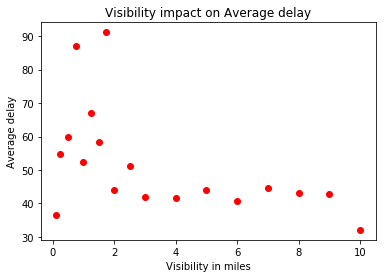

In [7]:
plt.scatter(df_vis.index, df_vis.dep_delay, color="red")
plt.ylabel('Average delay')
plt.xlabel('Visibility in miles')
plt.title('Visibility impact on Average delay')
plt.show()

In [8]:
df_isvis=df.copy()
df_isvis=df_isvis[df_isvis.dep_delay>0.0]
df_isvis=pd.DataFrame(df_isvis.groupby('visib').count()['dep_delay'])
df_count=pd.DataFrame(df.groupby('visib').count()['dep_delay'])

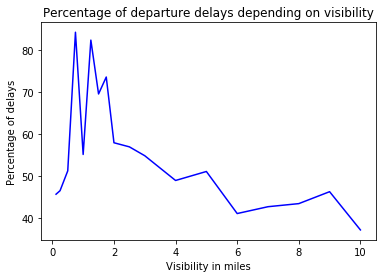

In [9]:
plt.plot(df_isvis.index, df_isvis.dep_delay/df_count.dep_delay*100, color="blue")
plt.ylabel('Percentage of delays')
plt.xlabel('Visibility in miles')
plt.title('Percentage of departure delays depending on visibility')
plt.show()

#### ВЫВОД 1: При плохой видимости чаще происходят задержки авиарейсов, причем время ожидания увеличивается

1.2)Ветер

In [10]:
df_wind=df.dropna(subset=['wind_dir'])
df_wind=df_wind.sort_values('wind_dir')
df_wind=pd.DataFrame(df_wind.groupby('wind_dir').mean()['dep_delay'])


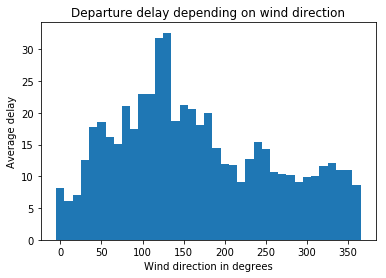

In [11]:
plt.bar(df_wind.index,df_wind.dep_delay,width=10)
plt.title('Departure delay depending on wind direction')
plt.xlabel('Wind direction in degrees')
plt.ylabel('Average delay')
plt.show()

In [12]:
df.drop(df[df.wind_speed>100].index,inplace=True)

In [13]:
df_speed=pd.DataFrame(df_filtered.groupby('wind_speed').count()['dep_delay'])
df_s=pd.DataFrame(df.groupby('wind_speed').count()['dep_delay'])

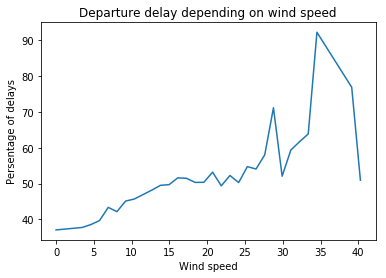

In [14]:
plt.plot(df_speed.index,df_speed.dep_delay/df_s.dep_delay*100)
plt.title('Departure delay depending on wind speed')
plt.xlabel('Wind speed')
plt.ylabel('Persentage of delays')
plt.show()

#### ВЫВОД 2:Сильный ветер часто приводит к  задержкам авиарейсов, Юго-восточное направление ветра является наиболее неудобным для посадки и взлета самолетов в данных аэропортах и приводит к увеличению задержек

2)Время

2.1)Время суток

In [15]:
df_time=pd.DataFrame(df_filtered.groupby('hour').count()['dep_delay'])
df_t=pd.DataFrame(df.groupby('hour').count()['dep_delay'])
df_time=df_time.append(pd.Series({'dep_delay':0},name=4.0)).sort_values('hour')

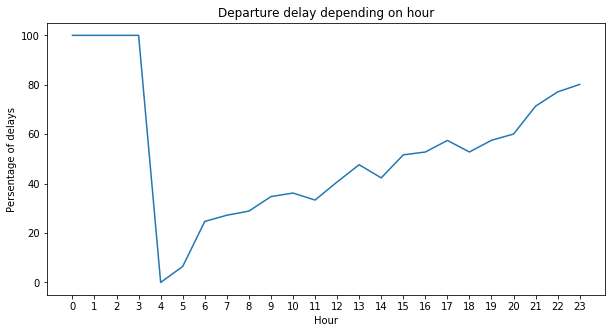

In [16]:
plt.figure(figsize=(10, 5))
plt.plot(df_time.index,df_time.dep_delay/df_t.dep_delay*100)
plt.title('Departure delay depending on hour')
plt.xlabel('Hour')
plt.ylabel('Persentage of delays')
plt.xticks(np.arange(0,24))
plt.show()

#### ВЫВОД 3: В течение дня задержки накапливаются из-за того, что отправление текущих рейсов влияет на отправление следующих. Это приводит к тому что аэропорт постоянно задерживает вылет ночных рейсов.
Необходимо увеличить количество резервных авиалайнеров и увеличить штат работников.

2.2) Месяц

In [17]:
df_month=pd.DataFrame(df_filtered.groupby('month').mean()['dep_delay'])
df_m=pd.DataFrame(df.groupby('month').count()['dep_delay'])

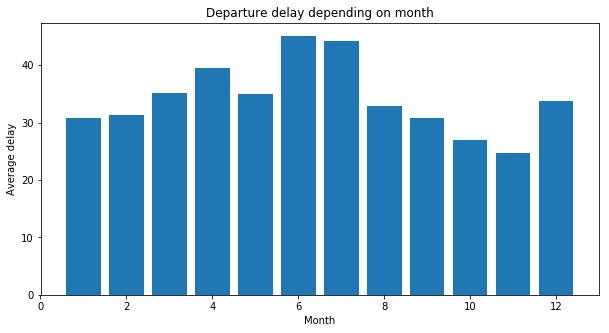

In [18]:
plt.figure(figsize=(10, 5))
plt.bar(df_month.index,df_month.dep_delay)
plt.title('Departure delay depending on month')
plt.xlabel('Month')
plt.ylabel('Average delay')
plt.show()

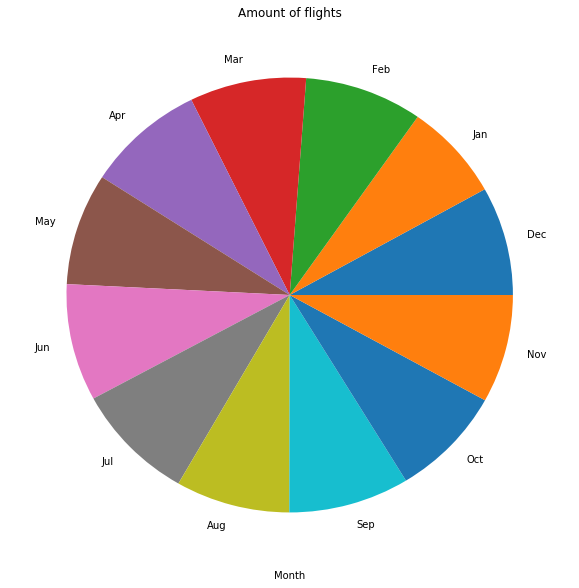

In [19]:
plt.figure(figsize=(10, 10))
plt.pie(df_m.dep_delay,labels=['Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov'])
plt.title('Amount of flights')
plt.xlabel('Month')
plt.show()

#### ВЫВОД 4: Количество рейсов приблизительно одинаковое каждый месяц, но летом и в декабре среднее время задержки вылета увеличивается.
Это не связано с увеличивающейся нагрузкой на аэропорт, скорее всего экипажи берут отпуск, что усложняет работу летом при неблагоприятной погоде и увеличивающихся задержках

3)Расстояние

In [35]:
df['d_cat'], bins =pd.qcut(df['distance'], 30,retbins=True)
df['d_cat']=df['d_cat'].apply(lambda x: x.left).astype('float64')
df_dis=pd.DataFrame(df_filtered.groupby('d_cat').mean()['dep_delay']).sort_values('d_cat')

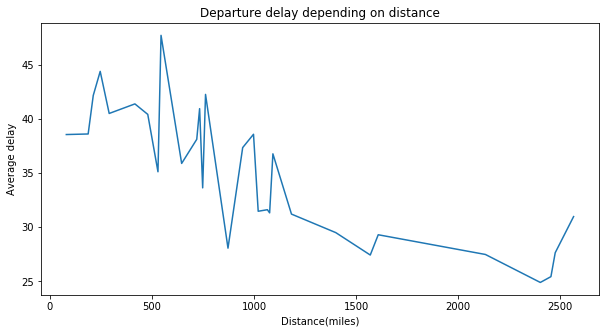

In [36]:
plt.figure(figsize=(10, 5))
plt.plot(df_dis.index,df_dis.dep_delay)
plt.title('Departure delay depending on distance')
plt.xlabel('Distance(miles)')
plt.ylabel('Average delay')
plt.show()

#### ВЫВОД 5: Более короткие по продолжительности рейсы задерживают на более продолжительное время. Это связано с тем, что задержки для продолжительных рейсов нет, так как это единственный рейс для экипажа и под него выделяется отдельный самолет.
Экипаж может за день провести несколько непродолжительных рейсов, что сложнее скоординировать и задержки увеличиваются.

4)Авиакомпания

In [37]:
df_com =pd.DataFrame(df_filtered.groupby('carrier').count()['dep_delay'])
df_c=pd.DataFrame(df.groupby('carrier').count()['dep_delay'])

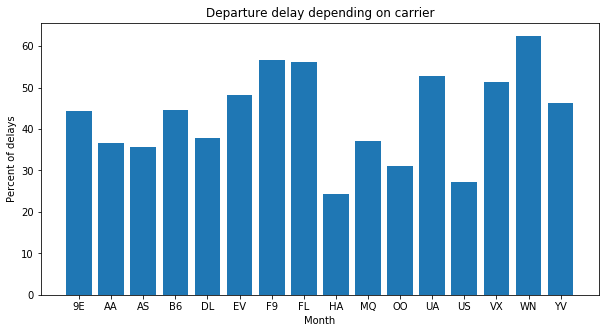

In [39]:
plt.figure(figsize=(10, 5))
plt.bar(df_com.index,df_com.dep_delay/df_c.dep_delay*100)
plt.title('Departure delay depending on carrier')
plt.xlabel('Month')
plt.ylabel('Percent of delays')
plt.show()

#### ВЫВОД 6: Некоторые перевозчики очень часто задерживают отправление рейсов. Им необходимо более тщательно планировать рейсы, увеличить авиапарк и штат

### Общий вывод: На задержки авиарейсов влияют два фактора. На первый из них - погоду, повлиять практически невозможно. Сильный ветер и низкая видимость препятствуют отправлению рейсов в срок. Второй фактор - добросовестность авиакомпаний. Маленький авиапарк, маленький рабочий штат и нерациональное расписание полётов увеличивают задержки. Это можно заметить по зависимости задержек от времени суток и месяца: проблема возникает из-за сокращения штата и накопления задержек отправления самолетов к концу дня 